# ADL Flowchart Test

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import StringIO
from IPython.display import SVG
import pydot

In [2]:
dot_graph = pydot.Dot(graph_type='digraph')

In [3]:
def make_node(name,shape):
    cur_node = pydot.Node(name)
    cur_node.set_shape(shape)
    dot_graph.add_node(cur_node)
    return cur_node

def make_link(a_node, b_node, label = None, width = 1, style='dashed'):
    cur_edge = pydot.Edge(a_node,b_node)
    cur_edge.set_penwidth(width)
    cur_edge.set_style(style)
    if label is not None: cur_edge.set_label(label)
    dot_graph.add_edge(cur_edge)
    return cur_edge

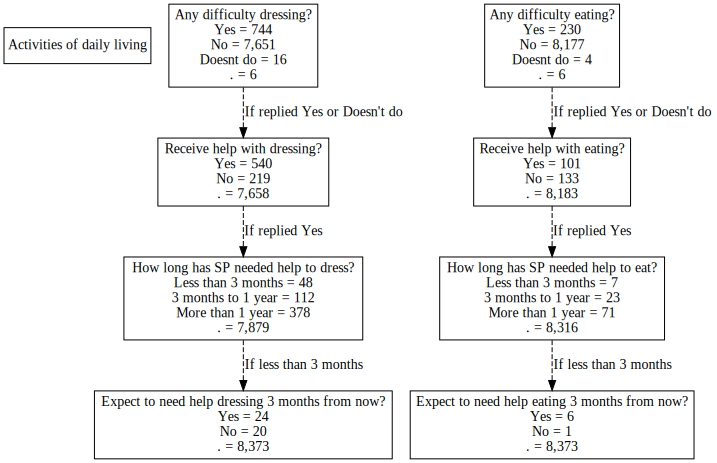

In [4]:
# Survey ADLs Node
svy = make_node("Activities of daily living", 'box')

# Dressing ADL
dres_diff = make_node('Any difficulty dressing?\nYes = 744\nNo = 7,651\nDoesnt do = 16\n. = 6','box' )
dres_help = make_node('Receive help with dressing?\nYes = 540\nNo = 219\n. = 7,658', 'box')

make_link(dres_diff, dres_help, " If replied Yes or Doesn't do")

long_dres = make_node('How long has SP needed help to dress?\nLess than 3 months = 48\n3 months to 1 year = 112\nMore than 1 year = 378\n. = 7,879', 'box')

make_link(dres_help, long_dres, " If replied Yes")

stildres = make_node("Expect to need help dressing 3 months from now?\nYes = 24\nNo = 20\n. = 8,373", 'box')

make_link(long_dres, stildres, " If less than 3 months")


# Eating ADL
eat_diff = make_node('Any difficulty eating?\nYes = 230\nNo = 8,177\nDoesnt do = 4\n. = 6','box' )
eat_help = make_node('Receive help with eating?\nYes = 101\nNo = 133\n. = 8,183', 'box')

make_link(eat_diff, eat_help, " If replied Yes or Doesn't do")

long_eat = make_node('How long has SP needed help to eat?\nLess than 3 months = 7\n3 months to 1 year = 23\nMore than 1 year = 71\n. = 8,316', 'box')

make_link(eat_help, long_eat, " If replied Yes")

stileat = make_node("Expect to need help eating 3 months from now?\nYes = 6\nNo = 1\n. = 8,373", 'box')

make_link(long_eat, stileat, " If less than 3 months")

#make_link(svy, dres_diff)
#make_link(svy, eat_diff)

dot_graph.set_overlap(False)
#dot_graph.set_rankdir('UD')
dot_graph.write_svg('adl_flowchart.svg', prog = 'dot')
SVG('adl_flowchart.svg')